<a href="https://colab.research.google.com/github/SophGrace24/K_Means_Events/blob/main/K_Means_Events.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means
I'll keep things simple. You don't want to be here all day reading and I don't want to be here all day typing.

1: K-means clustering is the project algorithm I'll be building.
2: Event data. This data is what I'll be working with, I made it myself. I introduced some interesting caveats like multiple cardinal directions (N, S, E, and so on) to explore what K-means will do. This data is dummy data mean to represent different types of theoretical events that could take place.
3: Result:
I hope to not only produce some practical clusters, but I hope to demonstrate the data in visually appealins ways. This is not necessary to the application but it's fun. Before anything else, I do these projects because I enjoy it and have a passion for them.

# Import Statements


In [1]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = "/content/KMeans_Event.csv"
df = pd.read_csv(file_path)
print(df.head())

   Is_North  Is_South  Is_East  Is_West  For_Elderly  For_Kids  For_Teens  \
0         1         0        0        0            1         1          1   
1         0         1        1        1            1         0          1   
2         1         0        0        0            0         0          1   
3         1         0        1        0            0         1          1   
4         1         0        0        0            0         1          1   

   For_Adults  Is_Necessity  Is_Recreational  Is_Business  Is_Community  \
0           1             1                0            0             1   
1           1             0                1            1             0   
2           0             0                1            1             0   
3           0             0                1            1             0   
4           0             1                0            0             1   

   For_Food  For_Music  Is_drive  Has_cost  
0         1          0         1         

In [4]:
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")


Dataset shape: (25, 16)
Columns: ['Is_North', 'Is_South', 'Is_East', 'Is_West', 'For_Elderly', 'For_Kids', 'For_Teens', 'For_Adults', 'Is_Necessity', 'Is_Recreational', 'Is_Business', 'Is_Community', 'For_Food', 'For_Music', 'Is_drive', 'Has_cost']


In [5]:
print(df.head(10))

   Is_North  Is_South  Is_East  Is_West  For_Elderly  For_Kids  For_Teens  \
0         1         0        0        0            1         1          1   
1         0         1        1        1            1         0          1   
2         1         0        0        0            0         0          1   
3         1         0        1        0            0         1          1   
4         1         0        0        0            0         1          1   
5         1         1        1        0            1         0          1   
6         0         0        0        1            1         0          0   
7         0         0        0        1            1         0          0   
8         0         0        1        0            0         1          0   
9         0         0        1        0            0         1          0   

   For_Adults  Is_Necessity  Is_Recreational  Is_Business  Is_Community  \
0           1             1                0            0             1   
1 

# Data Knowledge
The above section of the code focuses on just visualizing and understanding the data I'm working with. Even though I made it, I've been taught that it's good practice!

# Descriptive Stats
Next, I'll use Pandas to inform me on how many of each "classification" (or rather, how many True vs False) values I have.

In [6]:
feature_counts = df.sum().sort_values(ascending=False)
print("\n Number of events with each feature active: ")
print(feature_counts)


 Number of events with each feature active: 
For_Teens          17
For_Food           17
For_Adults         16
Is_East            13
For_Elderly        13
For_Music          13
Is_Recreational    13
For_Kids           13
Is_Business        13
Is_Community       12
Is_North           12
Is_drive           11
Has_cost           11
Is_West            10
Is_Necessity       10
Is_South            7
dtype: int64


This tells us how many 1's are under each category


# Descriptive Stats pt 2
Next, proportions

In [7]:
feature_proportions = df.mean().sort_values(ascending=False)
print("\n Proportion of events with each feature active: ")
print(feature_proportions)


 Proportion of events with each feature active: 
For_Teens          0.68
For_Food           0.68
For_Adults         0.64
Is_East            0.52
For_Elderly        0.52
For_Music          0.52
Is_Recreational    0.52
For_Kids           0.52
Is_Business        0.52
Is_Community       0.48
Is_North           0.48
Is_drive           0.44
Has_cost           0.44
Is_West            0.40
Is_Necessity       0.40
Is_South           0.28
dtype: float64


#Visualizations
I'll use Matplotlib and Seaborn as methods to visualize the data. I believe the best way, right now, will be Bar Charts, assigning numerical values or proportions to categorical.

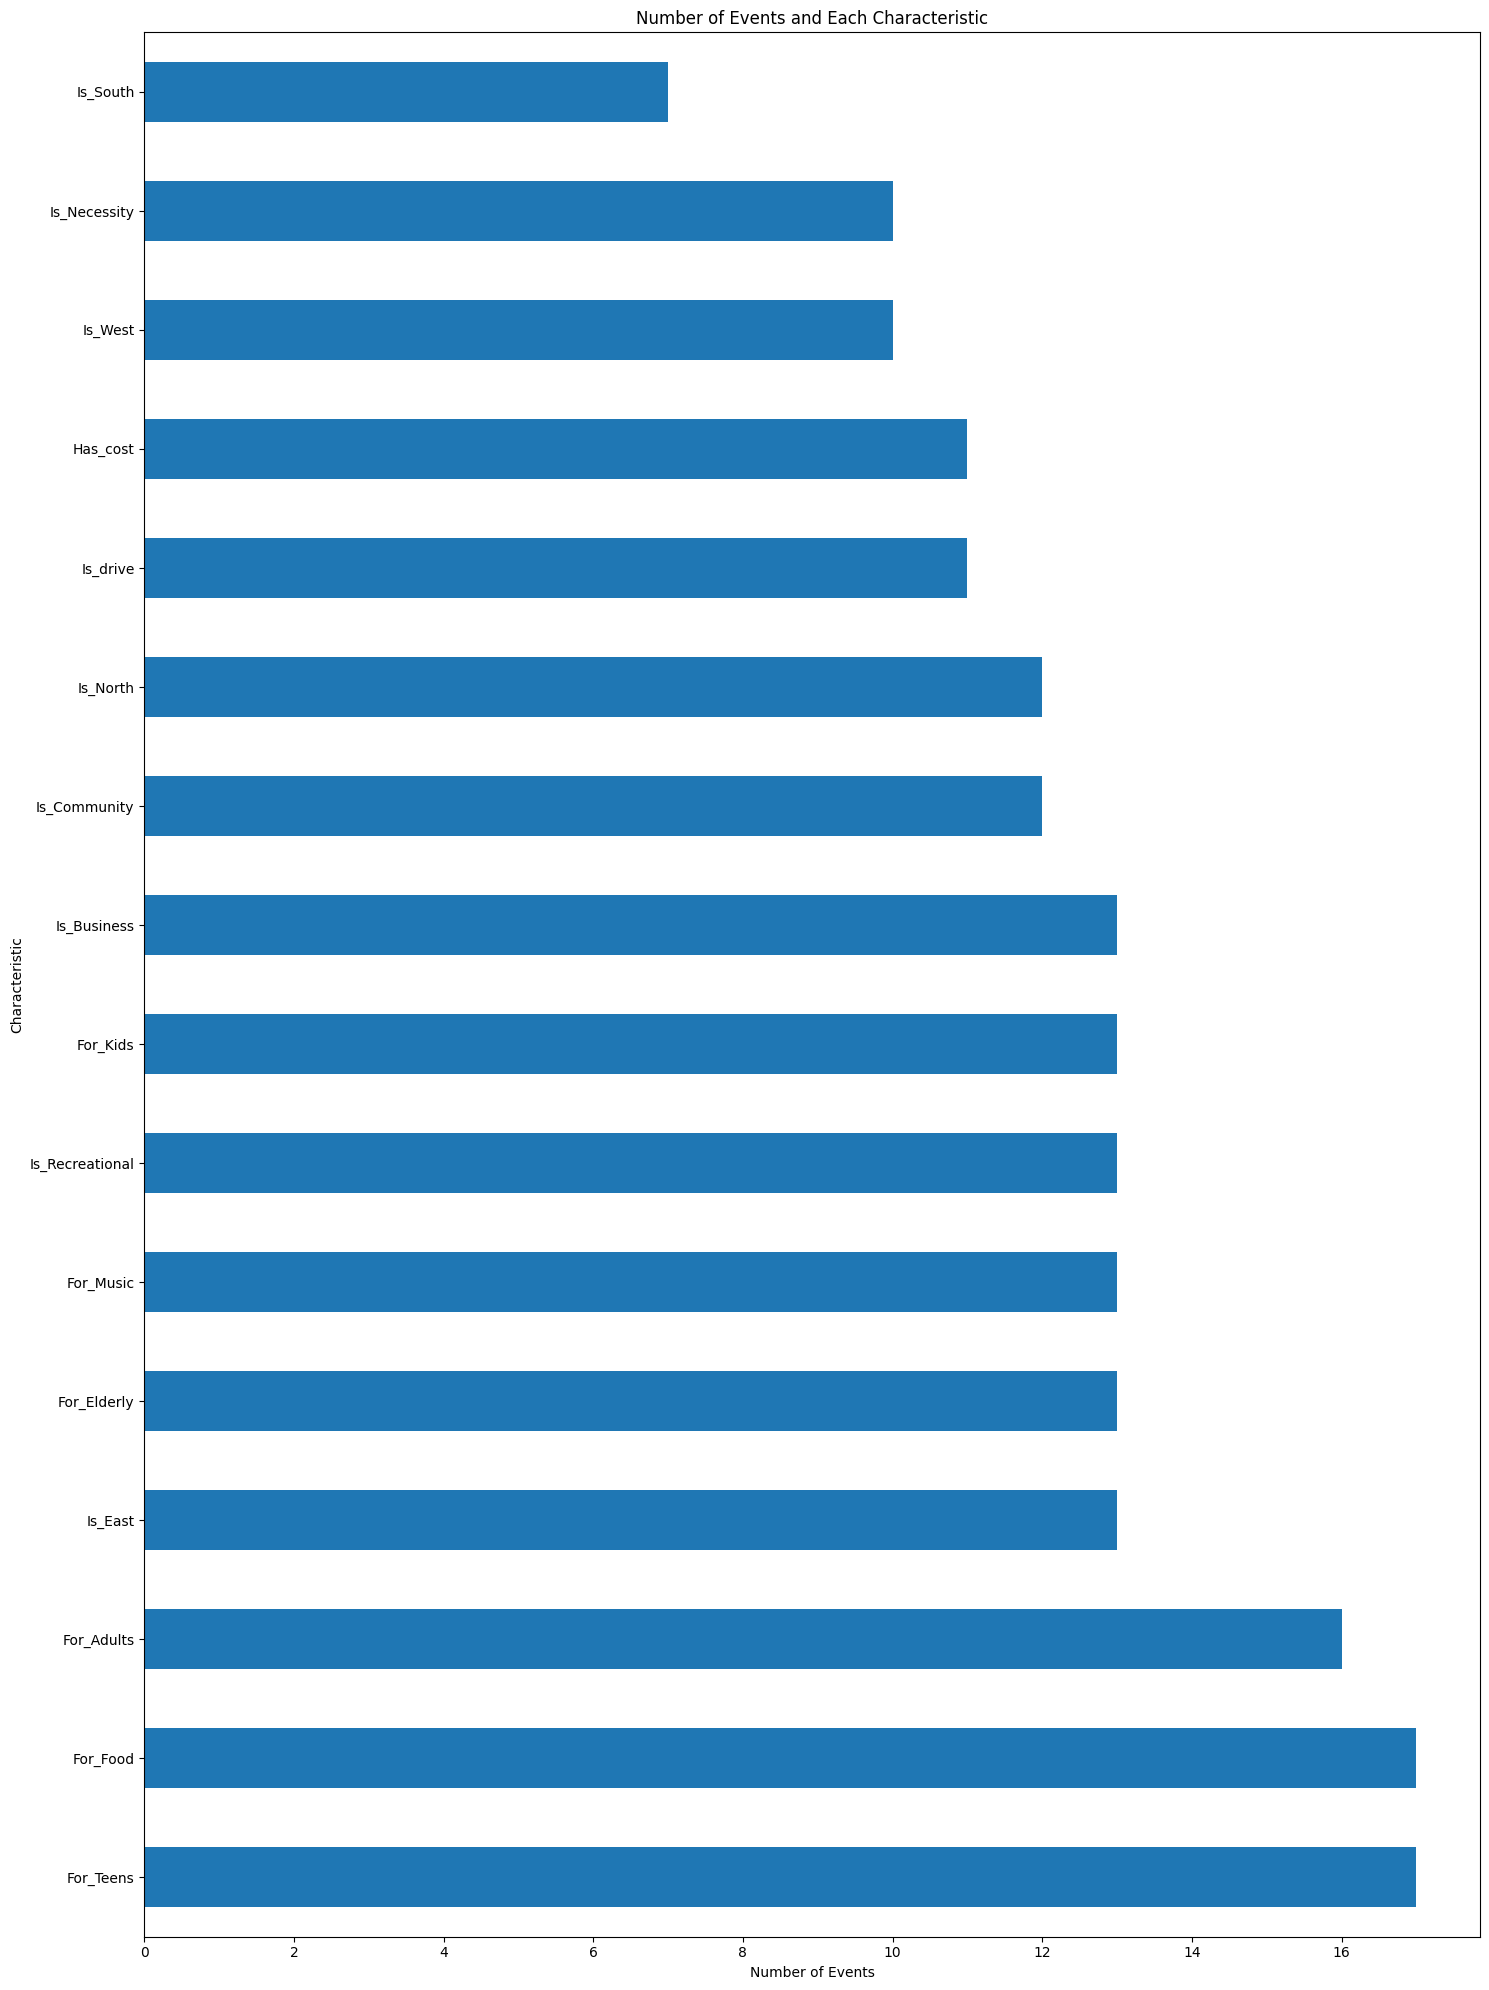

In [8]:
plt.figure(figsize= (15,20)) #figure size

#for counts
feature_counts.plot(kind='barh') #horizontal bar chart
plt.title('Number of Events and Each Characteristic')
plt.xlabel('Number of Events')
plt.ylabel('Characteristic')
plt.tight_layout() #adjusts to ensure it all fits
plt.show()


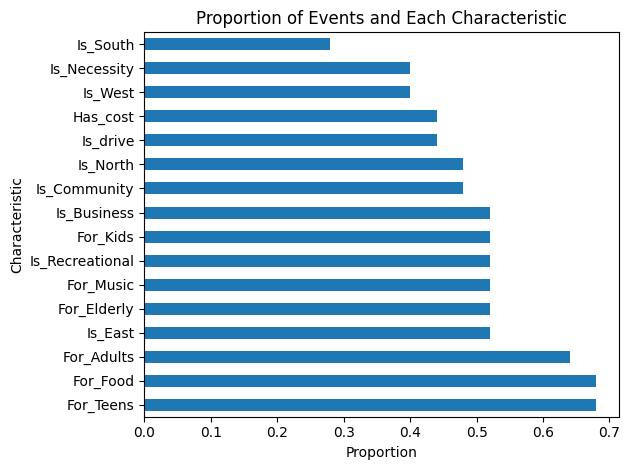

In [9]:
# Next, proportions

feature_proportions.plot(kind='barh')
plt.title('Proportion of Events and Each Characteristic')
plt.xlabel('Proportion')
plt.ylabel('Characteristic')
plt.tight_layout()
plt.show()

I definitely feel like the proportional display makes the most intuitive sense. Regardless, moving on!

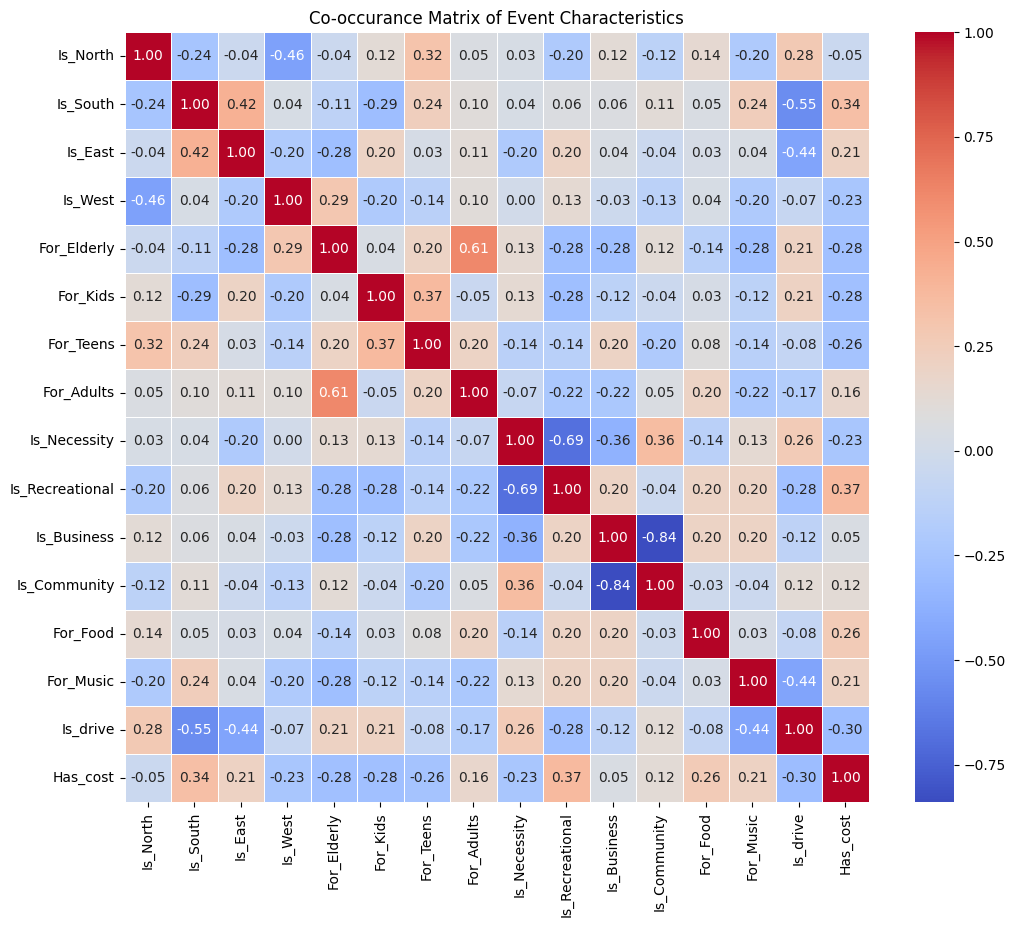

In [10]:
# Next, is a heatmap

correlation_matrix = df.corr() #calculates pairwise correlation

plt.figure(figsize = (12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Co-occurance Matrix of Event Characteristics')
plt.show()

I would do another heatmap with seaborn but in all honesty, I didn't order anything meaningfully on purpose, but after the K-means clustering algorithm, I might use that output as a way to do a Heatmap with the data itself.

HOWEVER:
I have a good amount of binary features. It can be hard to visualize all the events that high-dimensional space directly. As a result I'll implement a Dimensionality Reduction. Hopefully, I can reduce it to 2D for plotting, and maybe it'll show natural groupings before I ever apply K-means.

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#I know the common practice is putting all imports in the same section at the top of the code.
#Forgive me just this once

In [12]:
#Though I'm working with all Binary data, I'll still scale the data before PCA just to avoid any possible issues later.

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)


#PCA
The goal is to reduce to 2 dimensions. I've never used this exact sklearn feature before (if I'm being honest) so that's a big reason the import statements and this section is like an altered "chapter" in this notebook, so to speak. Forgive me for breaking etiquette with the import statements.

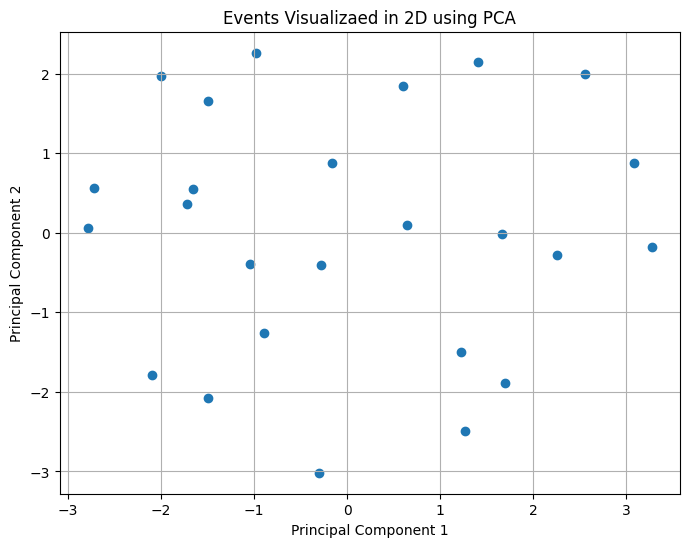

Explained Variance by PC1 and PC2: [0.20036676 0.14169555]


In [13]:
pca = PCA(n_components=2) #Reduce to 2 dimensions
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])

plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.title('Events Visualizaed in 2D using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
print(f"Explained Variance by PC1 and PC2: {pca.explained_variance_ratio_}")


#PCA Value
What this data can tell you is the most important direction in where my data varies the most. It projects the data down onto a lower-dimensional view (In my case, 2D) while trying to keep as much variation as possible, that is original to the data.

##For interpretation:
There are only a couple areas of distinct "clumps" (2 datapoints at most, really). From visual appearance alone, it seems there are a couple areas on the left region of the graph where data may (just from my visual interpretation) be closer together.

## What this means:
That my data doesn't contain any real clear seperations, so it's variance is continuous. I still plan to continue with my K-means algorithm because the PCA report may or may not be capturing the data accurately through just a PC1 and a PC2.

##The ratio
For PC1, it explains about 20.04% of the variance while PC2 explains about 14.17% Together, my 2D PCA captures about 34% of the total variance from my original ~17 features. This means about 1/3 of the total information or variability in my dataset is summarized in this graph. It's giving me a useful glimpse into the most dominant patterns.
HOWEVER:
This also means that about 65% of the variance in my data is not captured by just these two components. This variation exists along other dimensions, should I have utilized PC3, PC4 and so on.

###What does this really mean though?

This 2D plot acts like a projection. It's casting a shadow from a 3D object onto a 2D wall. Much like when a dentist takes your X-ray, if you have a tooth growing through a sinus cavity, they don't actually know if it's ABOVE the sinus cavity or if it's IN the Sinus cavity. That difference can mean a lot. Especially when it comes down to money and recovery time.

This also means that, fingers crossed, my K-means algorithm will find useful clusters because it's dealing with the "3D" object, and not the shadow cast on the wall. It's also not uncommon, as the literature says, for binary features to capture a moderate percentage like this, especially with PC1 and PC2.

### Final Thoughts on PCA
The most important thing is my K-means algorithm will hopefully find more meaningful clusters. This was a fun experiment though! I hope my explenations made sense.


#K-Means: Approach and Considerations
Due to the general interpretations of the elbow-method, I'd be remiss to skip it and not mention it. While I'm sure there are plenty applications that gain value from incorporating that method, I'm electing to use the Silhouette Score when it comes to choosing k.

##Understanding Silhouette
To understand why I chose this method, I'll briefly mention a few details:

Silhouette Score:
- Measures how similar a data point is to others in it's own cluster (cohesion)
- Compares the datapoint to it's nearest neighboring cluster (separation)
It feels like the most practical approach, especially if we don't want to be here all day. Where -1 means "you're in the wrong house" and +1 means "Hello MTV, welcome to my crib".

In [14]:
# Once again, forgive the improper import layout. This is for demonstration purposes, and I think it'll help relate a single library to a single feature, as opposed to having a whole list

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
#matplotlib is already imported

Silhouette Score for k=2: 0.0895
Silhouette Score for k=3: 0.1050
Silhouette Score for k=4: 0.0989
Silhouette Score for k=5: 0.0810
Silhouette Score for k=6: 0.0967
Silhouette Score for k=7: 0.0731
Silhouette Score for k=8: 0.0760
Silhouette Score for k=9: 0.0958
Silhouette Score for k=10: 0.1040


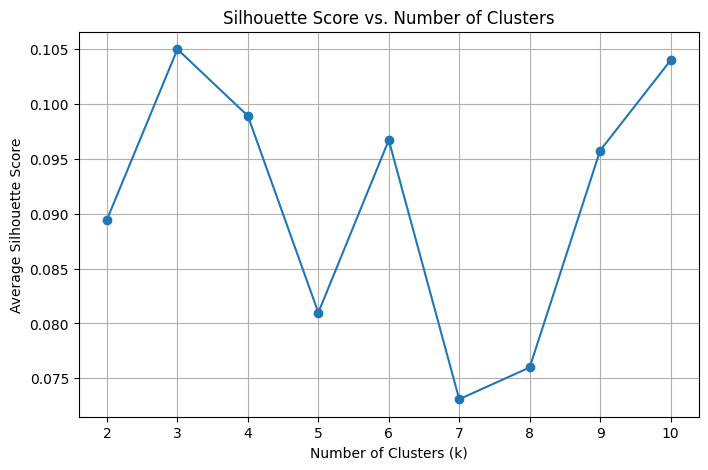

In [16]:
silhouette_scores = []
possible_k_values = range(2, 11) #No less than 2 k-values

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(df) #Fit and get cluster labels directly

    score = silhouette_score(df, cluster_labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score for k={k}: {score:.4f}") #print score for each k

    #Plotting the silhouette scores
plt.figure(figsize=(8,5))
plt.plot(possible_k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.grid(True)
plt.show()


# Silhouette Score Interpretation
So based on these numbers, it appears my highest average silhouette score is 0.1050 which occurs at k=3. This suggests that dividing my data into 3 clusters provides the best balance of cohesion. K=10 also gives a score of 0.1040, nearly identical to k=3.

# Overall
The scores are positive! This means, on average, the points are more similar to their own cluster than to others. However, the scores are mostly relatively low. The problem is that while there is some clustering structure, the clusters are not distinct or could be overlapping. This, actually, is fine and representative of many datasets where the clusters are not clear-cut.

# Strongest Candidate:
Based purely on Silhouette score, k=3 is the strongest option. While k=10 is very similar, having 10 clusters is impractical for a dataset of such small size.

In [17]:
chosen_k = 3
kmeans = KMeans(n_clusters = chosen_k, random_state = 42, n_init="auto")
cluster_labels = kmeans.fit_predict(df)

#Add labels back to my original dataframe/copy to make analysis

df_clustered = df.copy() #I hear it's good practice to copy
df_clustered['cluster'] = cluster_labels

print(df_clustered.head())
print(f"\nEvents in each cluster:\n{df_clustered['cluster'].value_counts()}")


   Is_North  Is_South  Is_East  Is_West  For_Elderly  For_Kids  For_Teens  \
0         1         0        0        0            1         1          1   
1         0         1        1        1            1         0          1   
2         1         0        0        0            0         0          1   
3         1         0        1        0            0         1          1   
4         1         0        0        0            0         1          1   

   For_Adults  Is_Necessity  Is_Recreational  Is_Business  Is_Community  \
0           1             1                0            0             1   
1           1             0                1            1             0   
2           0             0                1            1             0   
3           0             0                1            1             0   
4           0             1                0            0             1   

   For_Food  For_Music  Is_drive  Has_cost  cluster  
0         1          0         1

# Interpretation so far
For 25 events, this is pretty good. No cluster is empty and I have a mix of sizes. Now comes the insight...What meakes each cluster unique?

#Plan
To look at the average profile. Since all features are binary, the average of a feature within a cluster will tell me the proportion of events within that cluster. (Have you ever typed a word so much that it lost meaning?)

In [18]:
cluster_profiles = df_clustered.groupby('cluster').mean()
print("Cluster Profiles (Mean of Features for each cluster): ")
print(cluster_profiles)

Cluster Profiles (Mean of Features for each cluster): 
         Is_North  Is_South   Is_East   Is_West  For_Elderly  For_Kids  \
cluster                                                                  
0        0.000000  0.250000  0.750000  0.500000     0.250000  0.750000   
1        0.454545  0.454545  0.636364  0.363636     0.272727  0.272727   
2        0.700000  0.100000  0.300000  0.400000     0.900000  0.700000   

         For_Teens  For_Adults  Is_Necessity  Is_Recreational  Is_Business  \
cluster                                                                      
0         0.250000    0.000000      0.750000         0.500000     0.500000   
1         0.636364    0.636364      0.090909         0.909091     0.727273   
2         0.900000    0.900000      0.600000         0.100000     0.300000   

         Is_Community  For_Food  For_Music  Is_drive  Has_cost  
cluster                                                         
0            0.500000  0.250000   0.750000  0.500000 

# Interpretation of Clusters
Cluster 0:
----------
Seems to capture events that are geographically in the East, primarily serve children, fufill essential needs while also having a strong musical component. The mix of recreation/business/community suggests these are multifaceted children's events or services.

Cluster 1:
----------
Perhaps a slight lean to the east. These are commerically oriented, paid-for entertainment events. Involve food, music - like festivals and concerts. Cater to a broader older audience and aren't focused on essential needs or pure;y community-driven initiatives.

Cluster 2:
--------
Predominantly in the north, with some west presence. Focuses on community-support events or services. Addresses essential needs, involves food, caters to all ages, are often drive-through accessible and are generally not commerical or purely recreational. Community food-drives, mobile services, support initiatives.

#THATS ALL!
Thank you for coming along on this journey with me! That's all I have for you for this Notebook.

Github: SophGrace24
